# **Actividad 6: Redes Neuronales.**

Andrea Verónica Moreno España  2109443  *IMTC*


*   Gpo: 008
*   Hora: N4


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.15.0


In [2]:
#Importar datos
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist_data

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Etiquetas
class_names = ['Zero','One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

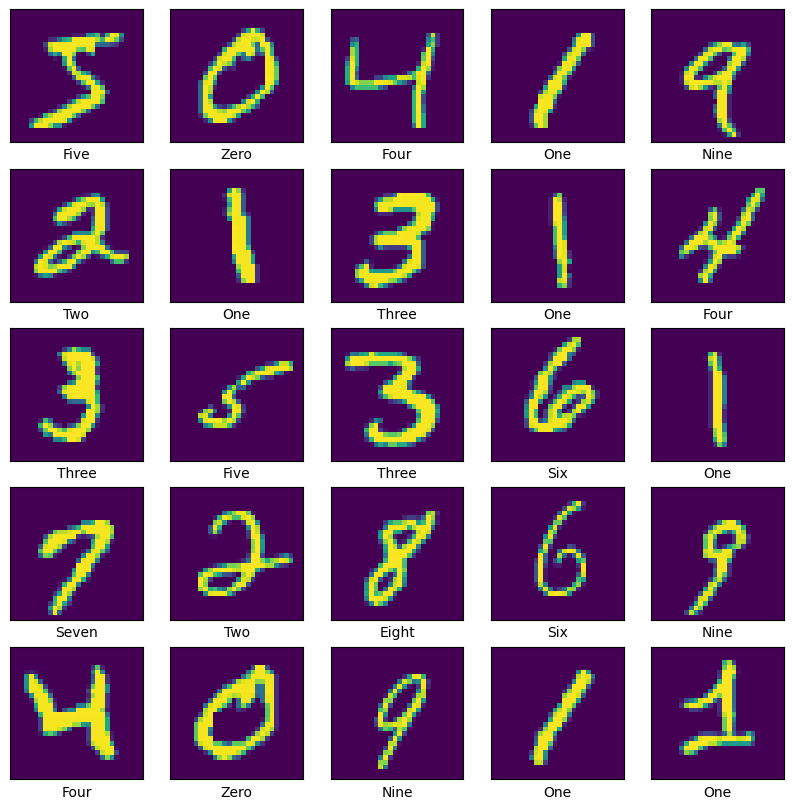

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
#Explorar datos
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

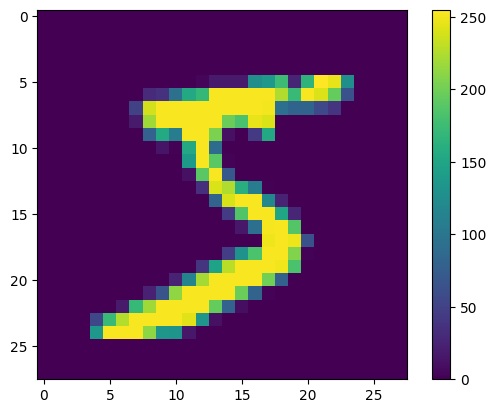

In [6]:
#Preprocesamiento
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
#Generar modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 32s 16ms/step - loss: 0.5275 - accuracy: 0.8260 - val_loss: 0.4007 - val_accuracy: 0.8733
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3432 - accuracy: 0.8866 - val_loss: 0.2550 - val_accuracy: 0.9157
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2352 - accuracy: 0.9248 - val_loss: 0.2198 - val_accuracy: 0.9297
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2055 - accuracy: 0.9322 - val_loss: 0.1969 - val_accuracy: 0.9382
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1842 - accuracy: 0.9393 - val_loss: 0.1796 - val_accuracy: 0.9442
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1688 - accuracy: 0.9440 - val_loss: 0.1686 - val_accuracy: 0.9459
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1571 - accuracy: 0.9484 - val_loss: 0.1666 - val_accura

313/313 - 1s - loss: 0.1623 - accuracy: 0.9497 - 1s/epoch - 4ms/step


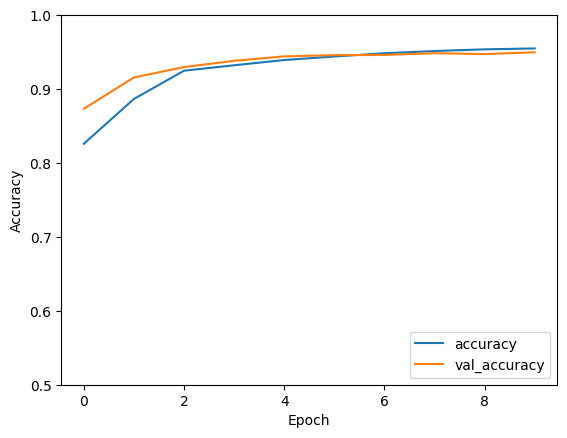

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.9496999979019165


In [19]:
#Predicciones
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

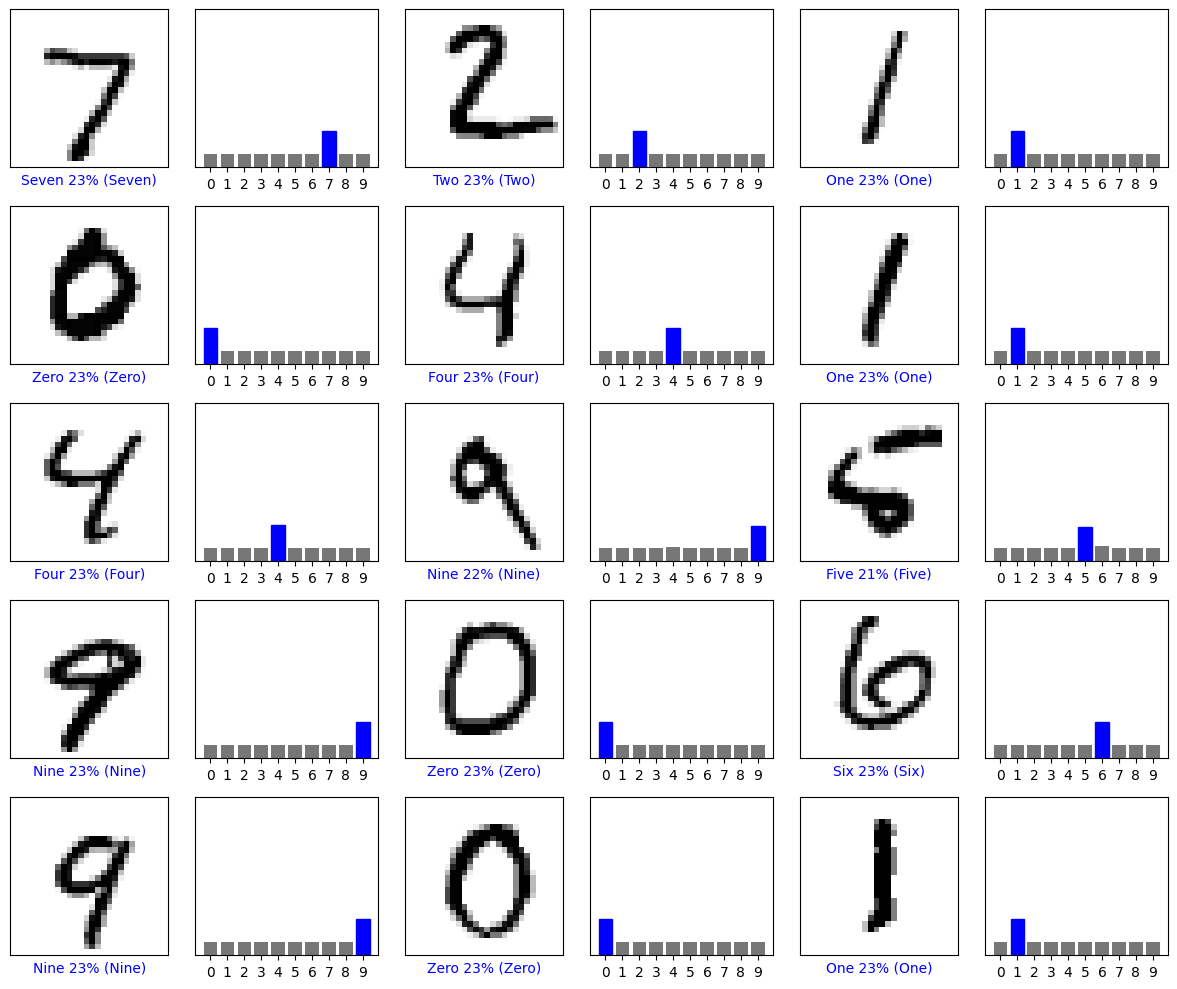

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## PREGUNTAS


1.   ***¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5? ***
  R= 10 epocas
2.   **¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?**

  R= No realmente, aunque las predicciones son correctas hay algún motivo por el que la RNC no esta del todo segura de la decisión y toma en cuenta TODAS las opciones